In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Decision Trees

Today we'll cover:

#####  Part 1: Decision Trees, an introduction.
    - Anatomy of a tree.
    - Advantages and disadvantages.
   
   
##### Part 2: How a Decision Tree is trained with machine learning.
    - The concept of purity.
    - Entropy and other measures of purity.
    - Greedy algorithms.
    
    
##### Part 3: Implementation on the _Congress Voting Record_ dataset.
    - Training a decision tree on a classification task using Sckit-learn.
    - Visualizing a tree using graphviz.
    - Feature importance.
    - Regularization.
    - Discussion.
    


### Decision Trees, an Introduction

##### Anatomy of a decision tree

On the iris dataset:
![](http://scikit-learn.org/stable/_images/iris.svg)

Terminology:
    
- Depth of the tree.
- Acyclic.
- Leaves, splits, branches.
- Binary vs. Multisplit.


#### Strengths  and Limitations

![](http://dataconomy.com/wp-content/uploads/2015/05/2.png)

### How to Teach a Computer to Play 20 Questions


![](https://www.devteam.space/blog/wp-content/uploads/2017/04/decision-tree.png)

We focus on the optimizing the __information gain__ with each split, a concept from information theory.

A good question has two properties:
- It splits the group in roughly equal chunks
- It allows us to say more about those chunks than about the original group

Most methods to train a decision tree implement a recursive greedy algorithm. Each question is chosen to maximize the purity gain resulting from the split; repeating this procedure culminates in a locally optimal sequence of questions.

##### Purity of a group

![image](http://cdn1.askiitians.com/Images/2017215-121423-9609-6-equal-sets.jpg)

Gini impurity of a set with $J$ classes:

$$1 - \sum_{i}^{\text{classes}} (\text{fraction of the set that is of class i})^2$$

The Gini Criterion seeks to minimize the weighted sum of the gini impurities of all groups.

$$\text{Gini Criterion}\underset{\text{Minimize}} \rightarrow \sum_{i}^{\text{groups}} (\text{percentage of members in group i}) \times (\text{gini impurity of group i})$$


![](http://scikit-learn.org/stable/_images/iris.svg)

# Example: The congressional voting record
### Predicting the party alignment of a member of congress

In [2]:
# Loading the data
issues =['handicapped-infants',
         'water-project-cost-sharing',
         'adoption-of-the-budget-resolution',
         'physician-fee-freeze',
         'el-salvador-aid',
         'religious-groups-in-schools',
         'anti-satellite-test-ban',
         'aid-to-nicaraguan-contras',
         'mx-missile',
         'immigration',
         'synfuels-corporation-cutback',
         'education-spending',
         'superfund-right-to-sue',
         'crime',
         'duty-free-exports',
         'export-administration-act-south-africa']

column_names = ['party'] + issues
df = pd.read_csv('https://archive.ics.uci.edu/' +
                 'ml/machine-learning-databases/' +
                 'voting-records/house-votes-84.data', names = column_names)
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [3]:
y = df['party'].map({'republican':0,'democrat':1})
X = df[issues]
X = X.applymap(lambda x: {'n':-1, 'y':1, '?': '0'}[x])

#### Training a decision tree (with sklearn)

In [4]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 1)

dtc.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
print('baseline:', y.mean())
print('accuracy:', dtc.score(X,y))

baseline: 0.6137931034482759
accuracy: 0.95632183908


#### Visualizing a graph (with graphviz)

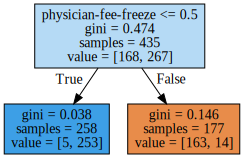

In [6]:
from sklearn.tree import export_graphviz
import graphviz

graph_data = export_graphviz(dtc, out_file=None, feature_names=issues, filled=True)

graphviz.Source(graph_data)

Reference material on computing the gini impurity and information gain:

In [7]:
#Computing the gini impurity by hand: 

print('Left branch: ', 1 - (5/258)**2 - (253/258)**2)
print('Right branch:', 1 - (14/177)**2 - (163/177)**2)


Left branch:  0.03800853314103736
Right branch: 0.14567972166363452


In [8]:
#Computing information gain by hand: 

impurity_of_parent_node = 0.474
samples = 435

impurity_of_left_branch = 0.038
samples_left_branch = 258
left_fraction = samples_left_branch/samples

impurity_of_right_branch = 0.146
samples_right_branch = 163
right_fraction = samples_right_branch/samples

impurity_of_children_nodes = impurity_of_left_branch*left_fraction \
                             + impurity_of_right_branch*right_fraction
      
print('Impurity of parent node: {:.2f}'.format(impurity_of_parent_node))
print('Weighted impurity of children nodes: {:.2f}'.format(impurity_of_children_nodes))

Impurity of parent node: 0.47
Weighted impurity of children nodes: 0.08


#### Measuring feature importance

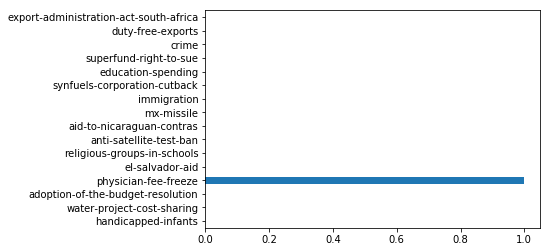

In [9]:
pd.Series(index=issues, data=dtc.feature_importances_).plot(kind = 'barh')
plt.show()

## Practice

In groups of two:

- Explore the options in 
    
        DecisionTreeClassifier() 
    
- Train a decision tree classifier to have the best out of sample performance.


- Upload a visualization of your model to slack.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

---
# Start of cut content for after independent practice
---

In [11]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'criterion':['gini','entropy'], 
                  'max_depth':[None,1,2,4,8,16], 
                  'min_samples_split':[2,4,8,16,32], 
                  'min_samples_leaf':[1,2,3,4,5], 
                  'max_features':[None,'auto','sqrt','log2',0.25,0.5,0.75],
                  'random_state':[1]}
    
rfc = DecisionTreeClassifier()

gs = GridSearchCV(rfc, param_grid=parameter_grid, cv = 3, n_jobs= -1, verbose=1)

gs.fit(X_train,y_train)
gs.best_estimator_

Fitting 3 folds for each of 2100 candidates, totalling 6300 fits


[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 6300 out of 6300 | elapsed:    3.0s finished


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=16,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [12]:
print(gs.best_estimator_.score(X_train, y_train))
print(gs.best_estimator_.score(X_test, y_test))

0.965517241379
0.954022988506


---
# End of cut content for after independent practice
---

### Teaser on random forest

In [13]:
from sklearn.metrics import accuracy_score

def vote(sequences):
    democratic_predictions = [np.round(np.mean(x)) for x in zip(sequences)]
    return democratic_predictions

In [14]:
sequences = []

# accuracy_score(y_test, vote(sequences))